In [1]:
%pip install pandas numpy scikit-learn matplotlib


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 2.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.0 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.0 MB 2.1 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.0 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 1.6 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 1.6 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.0 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.0 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.0 MB 1.5 MB/s eta 0:00:06
   --

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("heart_disease.csv")
print(df.head())

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   NaN    1   0       125   212    0        1      168      0      1.0   
1  53.0    1   0       140   203    1        0      155      1      3.1   
2   NaN    1   0       145   174    0        1      125      1      2.6   
3  61.0    1   0       148   203    0        1      161      0      0.0   
4  62.0    0   0       138   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


In [11]:
df.isnull().sum()

age         2
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1  53.0    1   0       140   203    1        0      155      1      3.1   
3  61.0    1   0       148   203    0        1      161      0      0.0   
4  62.0    0   0       138   294    1        1      106      0      1.9   
5  58.0    0   0       100   248    0        0      122      0      1.0   
6  58.0    1   0       114   318    0        2      140      0      4.4   

   slope  ca  thal  target  
1      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  
5      1   0     2       1  
6      0   3     1       0

In [20]:
x = df.drop('target',axis=1)

x.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1  53.0    1   0       140   203    1        0      155      1      3.1   
3  61.0    1   0       148   203    0        1      161      0      0.0   
4  62.0    0   0       138   294    1        1      106      0      1.9   
5  58.0    0   0       100   248    0        0      122      0      1.0   
6  58.0    1   0       114   318    0        2      140      0      4.4   

   slope  ca  thal  
1      0   0     3  
3      2   1     3  
4      1   3     2  
5      1   0     2  
6      0   3     1

In [21]:
y = df['target']
y.head()

1    0
3    0
4    0
5    1
6    0
Name: target, dtype: int64

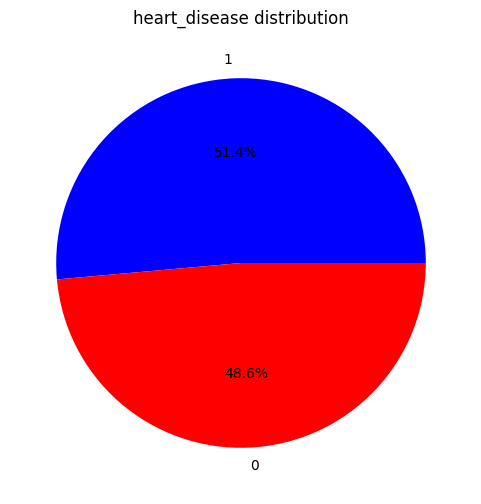

In [25]:
#pie chart to see the % of heart disease and not having heart disease
plt.figure(figsize=(6,6))
df['target'].value_counts().plot.pie(autopct="%1.1f%%",colors=['blue','red'])
plt.title("heart_disease distribution")
plt.ylabel("")
plt.show()

Note: you may need to restart the kernel to use updated packages.


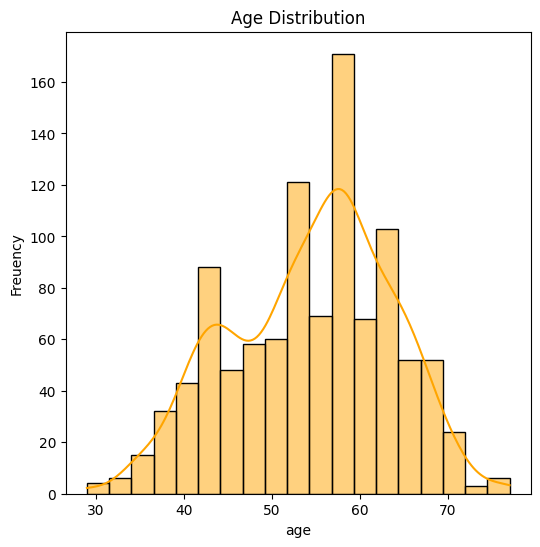

In [29]:
%pip install seaborn
import seaborn as sns
plt.figure(figsize=(6,6))
sns.histplot(df['age'],kde=True,color = 'orange')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('Freuency')
plt.show()

In [30]:
#logistic regresion model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2)

In [35]:
y_test.head()

465    1
757    1
833    0
534    1
693    1
Name: target, dtype: int64

In [36]:
x_test.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
465  38.0    1   2       138   175    0        1      173      0      0.0   
757  66.0    1   0       160   228    0        0      138      0      2.3   
833  55.0    1   0       140   217    0        1      111      1      5.6   
534  54.0    0   2       108   267    0        0      167      0      0.0   
693  63.0    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
465      2   4     2  
757      2   0     1  
833      0   0     3  
534      2   0     2  
693      2   2     2

In [37]:
scaler  = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scalert = scaler.transform(x_test)


In [38]:
log_regrestion = LogisticRegression()

log_regrestion.fit(x_train_scaler,y_train)
# .pkl

LogisticRegression()

In [39]:
import pickle
with open('log_reg.pkl',mode='wb') as s:
    pickle.dump(log_regrestion,s)

In [40]:
with open('scaler.pkl',mode='wb') as f:
    pickle.dump(scaler,f)

In [41]:
print(x_test.head())
print(y_test.head())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
465  38.0    1   2       138   175    0        1      173      0      0.0   
757  66.0    1   0       160   228    0        0      138      0      2.3   
833  55.0    1   0       140   217    0        1      111      1      5.6   
534  54.0    0   2       108   267    0        0      167      0      0.0   
693  63.0    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
465      2   4     2  
757      2   0     1  
833      0   0     3  
534      2   0     2  
693      2   2     2  
465    1
757    1
833    0
534    1
693    1
Name: target, dtype: int64


In [45]:
test_arr = np.array(x_test)
print(test_arr)

[[38.  1.  2. ...  2.  4.  2.]
 [66.  1.  0. ...  2.  0.  1.]
 [55.  1.  0. ...  0.  0.  3.]
 ...
 [54.  1.  2. ...  2.  0.  3.]
 [65.  0.  0. ...  1.  3.  3.]
 [63.  1.  0. ...  2.  2.  3.]]


In [52]:
test_scaler = scaler.transform(test_arr)
# Create 10 sample test cases
sample_cases = np.array([
    # [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
        [67, 1, 4, 120, 229, 0, 2, 129, 1, 2.6, 2, 2, 7],
        [57, 1, 2, 124, 261, 0, 0, 141, 0, 0.3, 1, 0, 7],
        [64, 1, 4, 128, 263, 0, 0, 105, 1, 0.2, 2, 1, 7],
        [59, 1, 4, 135, 234, 0, 0, 161, 0, 0.5, 2, 0, 7],
        [46, 1, 4, 140, 311, 0, 0, 120, 1, 1.8, 2, 2, 7],
        [71, 0, 4, 112, 149, 0, 0, 125, 0, 1.6, 2, 0, 3],
        [60, 1, 4, 140, 293, 0, 2, 170, 0, 1.2, 2, 2, 7],
        [48, 0, 3, 130, 275, 0, 0, 139, 0, 0.2, 1, 0, 3],
        [40, 1, 1, 140, 199, 0, 0, 178, 1, 1.4, 1, 0, 7],
        [54, 0, 2, 132, 288, 1, 2, 159, 1, 0, 1, 1, 3]
])
rand_cas = scaler.transform(sample_cases)

c:\Users\vvick\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\vvick\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
with open("log_reg.pkl",mode='rb') as f:
    logreg_model = pickle.load(f)
with open("scaler.pkl",mode='rb') as f:
    scal_model = pickle.load(f)

In [57]:
predict_logreg = logreg_model.predict(test_scaler)
sample_predict_logreg = logreg_model.predict(rand_cas)
# print(x_test.head())
print(predict_logreg)
print(sample_predict_logreg)

[1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0]
[0 0 0 0 0 1 0 1 0 1]


In [58]:
acc_logreg = accuracy_score(y_test,predict_logreg)
print(acc_logreg)

0.8829268292682927


In [59]:
calssificationreport = classification_report(y_test,predict_logreg)
print(calssificationreport)
#0 no heart disease
#1 heart disease

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       103
           1       0.86      0.91      0.89       102

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



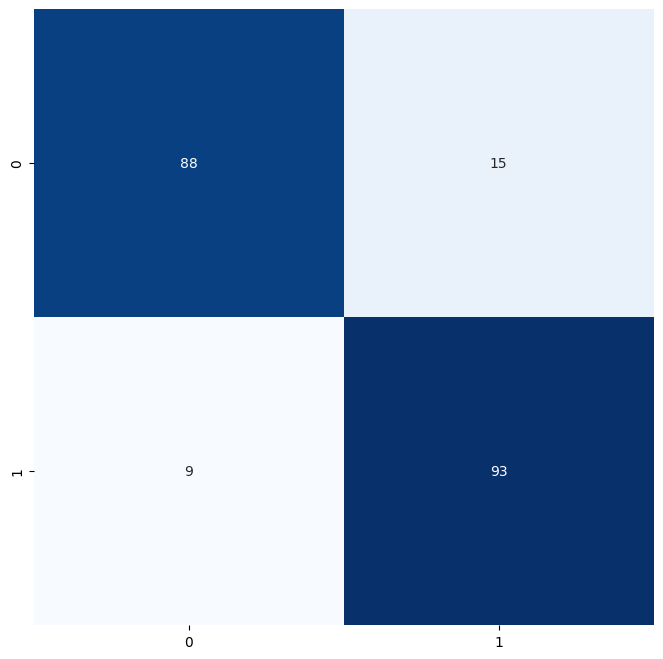

In [62]:
plt.figure(figsize=(8,8))
cm  = confusion_matrix(y_test,predict_logreg)
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False)
plt.show()